In [1]:
import requests
import json
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
#Assessor Parcels Data - 2006 thru 2021
#https://data.lacounty.gov/resource/9trm-uz8i.json
#paceldf has 1000 rows
#westlake
zip=['90017','90057','90003','90026','90005','90020','90004','90012']
parceldf = pd.DataFrame() 
for x in zip:
    requestString = 'https://data.lacounty.gov/resource/9trm-uz8i.json?situszip5={}&$limit=1000000'.format(x)
    r = requests.get(requestString)
    d = pd.DataFrame(json.loads(r.text))
    parceldf=pd.concat([parceldf,d], axis=0).reset_index(drop=True)     

parceldf


,situszip,taxratearea_city,ain,rollyear,taxratearea,assessorid,propertylocation,usetype,usecode,usecodedescchar1,...,situscity,situszip5,rowid,center_lat,center_lon,location_1,situsdirection,usecodedescchar3,situsunit,situsfraction
0,90017-1644,LOS ANGELES,5142012906,2019,12706,5142-012-906,680 LITTLE ST LOS ANGELES CA 90017,VAC,100V,Commercial,...,LOS ANGELES CA,90017,20195142012906,34.055427620000003,-118.27178105,"{'latitude': '34.05542762', 'longitude': '-118...",NaN,NaN,NaN,NaN
1,90017-4313,LOS ANGELES,5142019013,2019,12706,5142-019-013,836 GREEN AVE LOS ANGELES CA 90017,OTH,7200,Institutional,...,LOS ANGELES CA,90017,20195142019013,34.050990110000001,-118.27109074000001,"{'latitude': '34.05099011', 'longitude': '-118...",NaN,NaN,NaN,NaN
2,90017-3209,LOS ANGELES,5144006025,2019,00211,5144-006-025,626 WILSHIRE BLVD LOS ANGELES CA 90017,C/I,1706,Commercial,...,LOS ANGELES CA,90017,20195144006025,34.04824249,-118.25694958,"{'latitude': '34.04824249', 'longitude': '-118...",NaN,NaN,NaN,NaN
3,90017-3411,LOS ANGELES,5144008013,2019,00211,5144-008-013,654 S FIGUEROA ST LOS ANGELES CA 90017,C/I,1708,Commercial,...,LOS ANGELES CA,90017,20195144008013,34.049410250000001,-118.25935145,"{'latitude': '34.04941025', 'longitude': '-118...",S,NaN,NaN,NaN
4,90017-2802,LOS ANGELES,4240012001,2019,00067,4240-012-001,600 S FLOWER ST LOS ANGELES CA 90017,R-I,0500,Residential,...,LOS ANGELES CA,90017,20194240012001,33.998241210000003,-118.47088696,"{'latitude': '33.99824121', 'longitude': '-118...",S,4 Stories or Less,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668034,90012,LOS ANGELES,5447020901,2021,00004,5447-020-901,1771 SPRING ST LOS ANGELES CA 90012,OTH,8800,Miscellaneous,...,LOS ANGELES CA,90012,20215447020901,34.071497049999998,-118.22372206999999,"{'latitude': '34.07149705', 'longitude': '-118...",NaN,NaN,NaN,NaN
668035,90012-2700,GLENDALE,5616001902,2021,04045,5616-001-902,3500 CRESCENTA AVE GLENDALE CA 90012,OTH,8800,Miscellaneous,...,GLENDALE CA,90012,20215616001902,34.203347790000002,-118.23763408000001,"{'latitude': '34.20334779', 'longitude': '-118...",NaN,NaN,NaN,NaN
668036,90012-1210,LOS ANGELES,7412012902,2021,00014,7412-012-902,1111 FIGUEROA TER LOS ANGELES CA 90012,OTH,8800,Miscellaneous,...,LOS ANGELES CA,90012,20217412012902,33.783540260000002,-118.28404809,"{'latitude': '33.78354026', 'longitude': '-118...",NaN,NaN,NaN,NaN
668037,90012,LOS ANGELES,7423014049,2021,00018,7423-014-049,637 N BANNING BLVD LOS ANGELES CA 90012,VAC,830V,Miscellaneous,...,LOS ANGELES CA,90012,20217423014049,33.778084765638368,-118.25801237672569,"{'latitude': '33.77808476563837', 'longitude':...",N,NaN,NaN,NaN


In [3]:
#convert df to gdf
parcelgdf = gpd.GeoDataFrame(
    parceldf, geometry=gpd.points_from_xy(parceldf.center_lon, parceldf.center_lat, 
                                          crs='EPSG:4326'))
parcelgdf.head()

,situszip,taxratearea_city,ain,rollyear,taxratearea,assessorid,propertylocation,usetype,usecode,usecodedescchar1,...,situszip5,rowid,center_lat,center_lon,location_1,situsdirection,usecodedescchar3,situsunit,situsfraction,geometry
0,90017-1644,LOS ANGELES,5142012906,2019,12706,5142-012-906,680 LITTLE ST LOS ANGELES CA 90017,VAC,100V,Commercial,...,90017,20195142012906,34.055427620000003,-118.27178105,"{'latitude': '34.05542762', 'longitude': '-118...",NaN,NaN,NaN,NaN,POINT (-118.27178 34.05543)
1,90017-4313,LOS ANGELES,5142019013,2019,12706,5142-019-013,836 GREEN AVE LOS ANGELES CA 90017,OTH,7200,Institutional,...,90017,20195142019013,34.050990110000001,-118.27109074000001,"{'latitude': '34.05099011', 'longitude': '-118...",NaN,NaN,NaN,NaN,POINT (-118.27109 34.05099)
2,90017-3209,LOS ANGELES,5144006025,2019,00211,5144-006-025,626 WILSHIRE BLVD LOS ANGELES CA 90017,C/I,1706,Commercial,...,90017,20195144006025,34.04824249,-118.25694958,"{'latitude': '34.04824249', 'longitude': '-118...",NaN,NaN,NaN,NaN,POINT (-118.25695 34.04824)
3,90017-3411,LOS ANGELES,5144008013,2019,00211,5144-008-013,654 S FIGUEROA ST LOS ANGELES CA 90017,C/I,1708,Commercial,...,90017,20195144008013,34.049410250000001,-118.25935145,"{'latitude': '34.04941025', 'longitude': '-118...",S,NaN,NaN,NaN,POINT (-118.25935 34.04941)
4,90017-2802,LOS ANGELES,4240012001,2019,00067,4240-012-001,600 S FLOWER ST LOS ANGELES CA 90017,R-I,0500,Residential,...,90017,20194240012001,33.998241210000003,-118.47088696,"{'latitude': '33.99824121', 'longitude': '-118...",S,4 Stories or Less,NaN,NaN,POINT (-118.47089 33.99824)


In [4]:
#ignore this
import csv
df = pd.read_csv('/Users/pearlliu100/Documents/GitHub/UDS-Project--Full-Team-/Data/Assessor_Parcels_Data_-_2006_thru_2021.csv')
df.head()

,ZIPcode,TaxRateArea_CITY,AIN,RollYear,TaxRateArea,AssessorID,PropertyLocation,PropertyType,PropertyUseCode,GeneralUseType,...,HouseFraction,StreetDirection,StreetName,UnitNo,City,ZIPcode5,rowID,CENTER_LAT,CENTER_LON,Location 1
0,90017,LOS ANGELES,5070003033,2021,67,5070-003-033,1376 S ORANGE DR LOS ANGELES CA 90017,R-I,0200,Residential,...,NaN,S,ORANGE DR,NaN,LOS ANGELES CA,90017,20215070003033,34.048633,-118.346344,"(34.04863285, -118.34634432)"
1,90017,LOS ANGELES,5115016009,2021,7,5115-016-009,880 E 43RD ST LOS ANGELES CA 90017,R-I,0200,Residential,...,NaN,E,43RD ST,NaN,LOS ANGELES CA,90017,20215115016009,34.005468,-118.260125,"(34.00546798, -118.26012538)"
2,90017,LOS ANGELES,5143027044,2021,67,5143-027-044,"1010 WILSHIRE BLVD, NO 212 LOS ANGELES CA ...",CND,01HE,Residential,...,NaN,NaN,WILSHIRE BLVD,NO 212,LOS ANGELES CA,90017,20215143027044,34.051510,-118.262225,"(34.05150961, -118.26222476)"
3,90017,LOS ANGELES,5143027069,2021,67,5143-027-069,"1010 WILSHIRE BLVD, NO 407 LOS ANGELES CA ...",CND,01HE,Residential,...,NaN,NaN,WILSHIRE BLVD,NO 407,LOS ANGELES CA,90017,20215143027069,34.051510,-118.262225,"(34.05150961, -118.26222476)"
4,90017,LOS ANGELES,5144006054,2021,211,5144-006-054,"655 S HOPE ST, NO 808 LOS ANGELES CA 90017",CND,01HE,Residential,...,NaN,S,HOPE ST,NO 808,LOS ANGELES CA,90017,20215144006054,34.048372,-118.257691,"(34.04837232, -118.25769099)"


In [5]:
#census tract
census = gpd.read_file('/Users/pearlliu100/Documents/GitHub/UDS-Project--Full-Team-/Data/Census_Tracts_2020.geojson')
census.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [6]:
#join parceldf and census
gdf_sjoin = gpd.sjoin(parcelgdf,census.to_crs('EPSG:4326'),how="left", predicate='intersects')
gdf_sjoin

,situszip,taxratearea_city,ain,rollyear,taxratearea,assessorid,propertylocation,usetype,usecode,usecodedescchar1,...,usecodedescchar3,situsunit,situsfraction,geometry,index_right,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength
0,90017-1644,LOS ANGELES,5142012906,2019,12706,5142-012-906,680 LITTLE ST LOS ANGELES CA 90017,VAC,100V,Commercial,...,NaN,NaN,NaN,POINT (-118.27178 34.05543),621.0,622.0,208902,2089.02,1.981074e+06,5658.695104
1,90017-4313,LOS ANGELES,5142019013,2019,12706,5142-019-013,836 GREEN AVE LOS ANGELES CA 90017,OTH,7200,Institutional,...,NaN,NaN,NaN,POINT (-118.27109 34.05099),630.0,631.0,209300,2093.00,3.297116e+06,7931.222369
2,90017-3209,LOS ANGELES,5144006025,2019,00211,5144-006-025,626 WILSHIRE BLVD LOS ANGELES CA 90017,C/I,1706,Commercial,...,NaN,NaN,NaN,POINT (-118.25695 34.04824),604.0,605.0,207712,2077.12,4.383834e+06,9437.966004
3,90017-3411,LOS ANGELES,5144008013,2019,00211,5144-008-013,654 S FIGUEROA ST LOS ANGELES CA 90017,C/I,1708,Commercial,...,NaN,NaN,NaN,POINT (-118.25935 34.04941),604.0,605.0,207712,2077.12,4.383834e+06,9437.966004
4,90017-2802,LOS ANGELES,4240012001,2019,00067,4240-012-001,600 S FLOWER ST LOS ANGELES CA 90017,R-I,0500,Residential,...,4 Stories or Less,NaN,NaN,POINT (-118.47089 33.99824),1008.0,1009.0,273200,2732.00,6.909621e+06,11507.950170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668034,90012,LOS ANGELES,5447020901,2021,00004,5447-020-901,1771 SPRING ST LOS ANGELES CA 90012,OTH,8800,Miscellaneous,...,NaN,NaN,NaN,POINT (-118.22372 34.07150),538.0,539.0,199700,1997.00,1.044707e+07,13865.225111
668035,90012-2700,GLENDALE,5616001902,2021,04045,5616-001-902,3500 CRESCENTA AVE GLENDALE CA 90012,OTH,8800,Miscellaneous,...,NaN,NaN,NaN,POINT (-118.23763 34.20335),1108.0,1109.0,300602,3006.02,1.642883e+07,25321.467936
668036,90012-1210,LOS ANGELES,7412012902,2021,00014,7412-012-902,1111 FIGUEROA TER LOS ANGELES CA 90012,OTH,8800,Miscellaneous,...,NaN,NaN,NaN,POINT (-118.28405 33.78354),2473.0,2474.0,980015,9800.15,5.823595e+07,35820.150627
668037,90012,LOS ANGELES,7423014049,2021,00018,7423-014-049,637 N BANNING BLVD LOS ANGELES CA 90012,VAC,830V,Miscellaneous,...,NaN,NaN,NaN,POINT (-118.25801 33.77808),1074.0,1075.0,294701,2947.01,1.888165e+07,19842.785052


<AxesSubplot:>

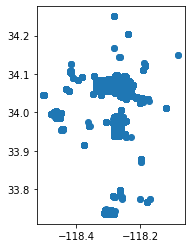

In [7]:
gdf_sjoin.plot()

In [8]:
gdf_sjoin.drop('index_right',inplace=True, axis=1)


In [9]:
#neighborhood boundary
nb= gpd.read_file('/Users/pearlliu100/Documents/GitHub/UDS-Project--Full-Team-/Data/LA_Times_Neighborhood_Boundaries (1)-Copy1.geojson')
#nb.name
wl=nb[nb.name=='Westlake']
wl

,OBJECTID,name,geometry
106,107,Westlake,"POLYGON ((-118.25908 34.05389, -118.25984 34.0..."


In [10]:
new_sjoin = gpd.sjoin(gdf_sjoin,nb.to_crs('EPSG:4326'),how="left", predicate='intersects')
new_sjoin

,situszip,taxratearea_city,ain,rollyear,taxratearea,assessorid,propertylocation,usetype,usecode,usecodedescchar1,...,situsfraction,geometry,OBJECTID_left,CT20,LABEL,ShapeSTArea,ShapeSTLength,index_right,OBJECTID_right,name
0,90017-1644,LOS ANGELES,5142012906,2019,12706,5142-012-906,680 LITTLE ST LOS ANGELES CA 90017,VAC,100V,Commercial,...,NaN,POINT (-118.27178 34.05543),622.0,208902,2089.02,1.981074e+06,5658.695104,106.0,107.0,Westlake
1,90017-4313,LOS ANGELES,5142019013,2019,12706,5142-019-013,836 GREEN AVE LOS ANGELES CA 90017,OTH,7200,Institutional,...,NaN,POINT (-118.27109 34.05099),631.0,209300,2093.00,3.297116e+06,7931.222369,106.0,107.0,Westlake
2,90017-3209,LOS ANGELES,5144006025,2019,00211,5144-006-025,626 WILSHIRE BLVD LOS ANGELES CA 90017,C/I,1706,Commercial,...,NaN,POINT (-118.25695 34.04824),605.0,207712,2077.12,4.383834e+06,9437.966004,23.0,24.0,Downtown
3,90017-3411,LOS ANGELES,5144008013,2019,00211,5144-008-013,654 S FIGUEROA ST LOS ANGELES CA 90017,C/I,1708,Commercial,...,NaN,POINT (-118.25935 34.04941),605.0,207712,2077.12,4.383834e+06,9437.966004,23.0,24.0,Downtown
4,90017-2802,LOS ANGELES,4240012001,2019,00067,4240-012-001,600 S FLOWER ST LOS ANGELES CA 90017,R-I,0500,Residential,...,NaN,POINT (-118.47089 33.99824),1009.0,273200,2732.00,6.909621e+06,11507.950170,97.0,98.0,Venice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668034,90012,LOS ANGELES,5447020901,2021,00004,5447-020-901,1771 SPRING ST LOS ANGELES CA 90012,OTH,8800,Miscellaneous,...,NaN,POINT (-118.22372 34.07150),539.0,199700,1997.00,1.044707e+07,13865.225111,56.0,57.0,Lincoln Heights
668035,90012-2700,GLENDALE,5616001902,2021,04045,5616-001-902,3500 CRESCENTA AVE GLENDALE CA 90012,OTH,8800,Miscellaneous,...,NaN,POINT (-118.23763 34.20335),1109.0,300602,3006.02,1.642883e+07,25321.467936,NaN,NaN,NaN
668036,90012-1210,LOS ANGELES,7412012902,2021,00014,7412-012-902,1111 FIGUEROA TER LOS ANGELES CA 90012,OTH,8800,Miscellaneous,...,NaN,POINT (-118.28405 33.78354),2474.0,980015,9800.15,5.823595e+07,35820.150627,41.0,42.0,Harbor City
668037,90012,LOS ANGELES,7423014049,2021,00018,7423-014-049,637 N BANNING BLVD LOS ANGELES CA 90012,VAC,830V,Miscellaneous,...,NaN,POINT (-118.25801 33.77808),1075.0,294701,2947.01,1.888165e+07,19842.785052,109.0,110.0,Wilmington


In [11]:
westlake=new_sjoin[new_sjoin.name=='Westlake']
westlake

,situszip,taxratearea_city,ain,rollyear,taxratearea,assessorid,propertylocation,usetype,usecode,usecodedescchar1,...,situsfraction,geometry,OBJECTID_left,CT20,LABEL,ShapeSTArea,ShapeSTLength,index_right,OBJECTID_right,name
0,90017-1644,LOS ANGELES,5142012906,2019,12706,5142-012-906,680 LITTLE ST LOS ANGELES CA 90017,VAC,100V,Commercial,...,NaN,POINT (-118.27178 34.05543),622.0,208902,2089.02,1.981074e+06,5658.695104,106.0,107.0,Westlake
1,90017-4313,LOS ANGELES,5142019013,2019,12706,5142-019-013,836 GREEN AVE LOS ANGELES CA 90017,OTH,7200,Institutional,...,NaN,POINT (-118.27109 34.05099),631.0,209300,2093.00,3.297116e+06,7931.222369,106.0,107.0,Westlake
9,90017,LOS ANGELES,5143027029,2019,00067,5143-027-029,"1010 WILSHIRE BLVD, NO 113 LOS ANGELES CA ...",CND,01HE,Residential,...,NaN,POINT (-118.26222 34.05151),629.0,209201,2092.01,1.810248e+06,5620.491334,106.0,107.0,Westlake
11,90017-1951,LOS ANGELES,5143029065,2019,00067,5143-029-065,"1100 WILSHIRE BLVD, NO 2208 LOS ANGELES CA ...",CND,01HE,Residential,...,NaN,POINT (-118.26389 34.05218),629.0,209201,2092.01,1.810248e+06,5620.491334,106.0,107.0,Westlake
13,90017-1966,LOS ANGELES,5143029134,2019,00067,5143-029-134,"1100 WILSHIRE BLVD, NO 2805 LOS ANGELES CA ...",CND,01HE,Residential,...,NaN,POINT (-118.26389 34.05218),629.0,209201,2092.01,1.810248e+06,5620.491334,106.0,107.0,Westlake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660683,90012-2000,LOS ANGELES,5152020040,2020,00067,5152-020-040,233 S BEAUDRY AVE LOS ANGELES CA 90012,C/I,1708,Commercial,...,NaN,POINT (-118.25636 34.05728),608.0,208001,2080.01,6.199668e+06,11659.754300,106.0,107.0,Westlake
661691,90012-2008,LOS ANGELES,5152020044,2020,00067,5152-020-044,1100 W 2ND ST LOS ANGELES CA 90012,C/I,2700,Commercial,...,NaN,POINT (-118.25579 34.05793),608.0,208001,2080.01,6.199668e+06,11659.754300,106.0,107.0,Westlake
664365,90012-2008,LOS ANGELES,5152020044,2021,00067,5152-020-044,1100 W 2ND ST LOS ANGELES CA 90012,C/I,2700,Commercial,...,NaN,POINT (-118.25579 34.05793),608.0,208001,2080.01,6.199668e+06,11659.754300,106.0,107.0,Westlake
664641,90012-2008,LOS ANGELES,5152020047,2021,00067,5152-020-047,1130 W 2ND ST LOS ANGELES CA 90012,C/I,1100,Commercial,...,NaN,POINT (-118.25633 34.05828),608.0,208001,2080.01,6.199668e+06,11659.754300,106.0,107.0,Westlake


In [12]:
#one of the year we want is 2020
westlake2020=westlake[westlake.rollyear=='2020']
westlake2020

,situszip,taxratearea_city,ain,rollyear,taxratearea,assessorid,propertylocation,usetype,usecode,usecodedescchar1,...,situsfraction,geometry,OBJECTID_left,CT20,LABEL,ShapeSTArea,ShapeSTLength,index_right,OBJECTID_right,name
28335,90017-1957,LOS ANGELES,5143029201,2020,00067,5143-029-201,"1100 WILSHIRE BLVD, NO 3409 LOS ANGELES CA ...",CND,01HE,Residential,...,NaN,POINT (-118.26389 34.05218),629.0,209201,2092.01,1.810248e+06,5620.491334,106.0,107.0,Westlake
28337,90017,LOS ANGELES,5143019163,2020,00067,5143-019-163,"1234 WILSHIRE BLVD, NO 503 LOS ANGELES CA ...",CND,010C,Residential,...,NaN,POINT (-118.26610 34.05308),628.0,209106,2091.06,2.385509e+06,6257.588486,106.0,107.0,Westlake
28338,90017-1966,LOS ANGELES,5143029130,2020,00067,5143-029-130,"1100 WILSHIRE BLVD, NO 2801 LOS ANGELES CA ...",CND,01HE,Residential,...,NaN,POINT (-118.26389 34.05218),629.0,209201,2092.01,1.810248e+06,5620.491334,106.0,107.0,Westlake
28339,90017-1935,LOS ANGELES,5143029212,2020,00067,5143-029-212,"1100 WILSHIRE BLVD, NO 3602 LOS ANGELES CA ...",CND,01HE,Residential,...,NaN,POINT (-118.26389 34.05218),629.0,209201,2092.01,1.810248e+06,5620.491334,106.0,107.0,Westlake
28342,90017-2205,LOS ANGELES,5142027014,2020,00067,5142-027-014,1527 WILSHIRE BLVD LOS ANGELES CA 90017,C/I,1900,Commercial,...,NaN,POINT (-118.26913 34.05525),628.0,209106,2091.06,2.385509e+06,6257.588486,106.0,107.0,Westlake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592535,90004-3601,LOS ANGELES,5501006027,2020,00067,5501-006-027,3595 BEVERLY BLVD LOS ANGELES CA 90004,C/I,2640,Commercial,...,NaN,POINT (-118.28643 34.07503),641.0,211121,2111.21,2.302636e+06,7588.943500,106.0,107.0,Westlake
592545,90004-6165,LOS ANGELES,5501019008,2020,00067,5501-019-008,211 S HOOVER ST LOS ANGELES CA 90004,R-I,0200,Residential,...,NaN,POINT (-118.28474 34.06998),641.0,211121,2111.21,2.302636e+06,7588.943500,106.0,107.0,Westlake
660484,90012-2008,LOS ANGELES,5152020047,2020,00067,5152-020-047,1130 W 2ND ST LOS ANGELES CA 90012,C/I,1100,Commercial,...,NaN,POINT (-118.25633 34.05828),608.0,208001,2080.01,6.199668e+06,11659.754300,106.0,107.0,Westlake
660683,90012-2000,LOS ANGELES,5152020040,2020,00067,5152-020-040,233 S BEAUDRY AVE LOS ANGELES CA 90012,C/I,1708,Commercial,...,NaN,POINT (-118.25636 34.05728),608.0,208001,2080.01,6.199668e+06,11659.754300,106.0,107.0,Westlake


In [13]:
#another year we want is 2010
westlake2010=westlake[westlake.rollyear=='2010']
westlake2010

,situszip,taxratearea_city,ain,rollyear,taxratearea,assessorid,propertylocation,usetype,usecode,usecodedescchar1,...,situsfraction,geometry,OBJECTID_left,CT20,LABEL,ShapeSTArea,ShapeSTLength,index_right,OBJECTID_right,name
6442,90017,LOS ANGELES,5142013913,2010,12706,5142-013-913,1601 W 7TH ST LOS ANGELES CA 90017,C/I,1100,Commercial,...,,POINT (-118.27129 34.05426),622.0,208902,2089.02,1.981074e+06,5658.695104,106.0,107.0,Westlake
6448,90017,LOS ANGELES,5142013911,2010,12706,5142-013-911,680 LITTLE ST LOS ANGELES CA 90017,VAC,100V,Commercial,...,,POINT (-118.27163 34.05443),622.0,208902,2089.02,1.981074e+06,5658.695104,106.0,107.0,Westlake
6456,90017,LOS ANGELES,5142013915,2010,12706,5142-013-915,680 LITTLE ST LOS ANGELES CA 90017,VAC,100V,Commercial,...,,POINT (-118.27259 34.05485),622.0,208902,2089.02,1.981074e+06,5658.695104,106.0,107.0,Westlake
6482,90017-2157,LOS ANGELES,5142014001,2010,12706,5142-014-001,1734 W 7TH ST LOS ANGELES CA 90017,C/I,1100,Commercial,...,,POINT (-118.27328 34.05460),634.0,209403,2094.03,1.487534e+06,4882.443510,106.0,107.0,Westlake
6490,90017,LOS ANGELES,5142012901,2010,12706,5142-012-901,680 LITTLE ST LOS ANGELES CA 90017,C/I,1703,Commercial,...,,POINT (-118.27122 34.05517),622.0,208902,2089.02,1.981074e+06,5658.695104,106.0,107.0,Westlake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512449,90004,LOS ANGELES,5501020901,2010,00067,5501-020-901,215 S COMMONWEALTH AVE LOS ANGELES CA 90004,OTH,8800,Miscellaneous,...,,POINT (-118.28647 34.06920),641.0,211121,2111.21,2.302636e+06,7588.943500,106.0,107.0,Westlake
512458,90004,LOS ANGELES,5501020900,2010,00067,5501-020-900,215 S COMMONWEALTH AVE LOS ANGELES CA 90004,OTH,8800,Miscellaneous,...,,POINT (-118.28626 34.06981),641.0,211121,2111.21,2.302636e+06,7588.943500,106.0,107.0,Westlake
625078,90012-2000,LOS ANGELES,5152020040,2010,00067,5152-020-040,233 S BEAUDRY AVE LOS ANGELES CA 90012,C/I,1708,Commercial,...,,POINT (-118.25635 34.05727),608.0,208001,2080.01,6.199668e+06,11659.754300,106.0,107.0,Westlake
625086,90012-2008,LOS ANGELES,5152020044,2010,00067,5152-020-044,1100 W 2ND ST LOS ANGELES CA 90012,C/I,2700,Commercial,...,,POINT (-118.25578 34.05792),608.0,208001,2080.01,6.199668e+06,11659.754300,106.0,107.0,Westlake


In [14]:
#use ain as index
#ain: 10 digit number assigned to each parcel within LA County. Same as assessorid but without the hyphens
westlake[westlake.ain=='5501020901']



,situszip,taxratearea_city,ain,rollyear,taxratearea,assessorid,propertylocation,usetype,usecode,usecodedescchar1,...,situsfraction,geometry,OBJECTID_left,CT20,LABEL,ShapeSTArea,ShapeSTLength,index_right,OBJECTID_right,name
494509,90004-6103,LOS ANGELES,5501020901,2019,00067,5501-020-901,215 S COMMONWEALTH AVE LOS ANGELES CA 90004,OTH,8800,Miscellaneous,...,NaN,POINT (-118.28648 34.06920),641.0,211121,2111.21,2.302636e+06,7588.9435,106.0,107.0,Westlake
501493,90004-6103,LOS ANGELES,5501020901,2017,00067,5501-020-901,215 S COMMONWEALTH AVE LOS ANGELES CA 90004,OTH,8800,Miscellaneous,...,,POINT (-118.28647 34.06920),641.0,211121,2111.21,2.302636e+06,7588.9435,106.0,107.0,Westlake
511164,90004-6103,LOS ANGELES,5501020901,2015,00067,5501-020-901,215 S COMMONWEALTH AVE LOS ANGELES CA 90004,OTH,8800,Miscellaneous,...,,POINT (-118.28647 34.06920),641.0,211121,2111.21,2.302636e+06,7588.9435,106.0,107.0,Westlake
512416,90004,LOS ANGELES,5501020901,2007,00067,5501-020-901,215 S COMMONWEALTH AVE LOS ANGELES CA 90004,OTH,8800,Miscellaneous,...,,POINT (-118.28647 34.06920),641.0,211121,2111.21,2.302636e+06,7588.9435,106.0,107.0,Westlake
512421,90004,LOS ANGELES,5501020901,2006,00067,5501-020-901,215 S COMMONWEALTH AVE LOS ANGELES CA 90004,OTH,8800,Miscellaneous,...,,POINT (-118.28647 34.06920),641.0,211121,2111.21,2.302636e+06,7588.9435,106.0,107.0,Westlake
512430,90004,LOS ANGELES,5501020901,2011,00067,5501-020-901,215 S COMMONWEALTH AVE LOS ANGELES CA 90004,OTH,8800,Miscellaneous,...,,POINT (-118.28647 34.06920),641.0,211121,2111.21,2.302636e+06,7588.9435,106.0,107.0,Westlake
512449,90004,LOS ANGELES,5501020901,2010,00067,5501-020-901,215 S COMMONWEALTH AVE LOS ANGELES CA 90004,OTH,8800,Miscellaneous,...,,POINT (-118.28647 34.06920),641.0,211121,2111.21,2.302636e+06,7588.9435,106.0,107.0,Westlake
512467,90004,LOS ANGELES,5501020901,2012,00067,5501-020-901,215 S COMMONWEALTH AVE LOS ANGELES CA 90004,OTH,8800,Miscellaneous,...,,POINT (-118.28647 34.06920),641.0,211121,2111.21,2.302636e+06,7588.9435,106.0,107.0,Westlake
512473,90004,LOS ANGELES,5501020901,2009,00067,5501-020-901,215 S COMMONWEALTH AVE LOS ANGELES CA 90004,OTH,8800,Miscellaneous,...,,POINT (-118.28647 34.06920),641.0,211121,2111.21,2.302636e+06,7588.9435,106.0,107.0,Westlake
512477,90004,LOS ANGELES,5501020901,2013,00067,5501-020-901,215 S COMMONWEALTH AVE LOS ANGELES CA 90004,OTH,8800,Miscellaneous,...,,POINT (-118.28647 34.06920),641.0,211121,2111.21,2.302636e+06,7588.9435,106.0,107.0,Westlake


In [15]:
westlake.columns

Index(['situszip', 'taxratearea_city', 'ain', 'rollyear', 'taxratearea',
       'assessorid', 'propertylocation', 'usetype', 'usecode',
       'usecodedescchar1', 'usecodedescchar2', 'usecodedescchar4',
       'totbuildingdatalines', 'yearbuilt', 'effectiveyearbuilt', 'sqftmain',
       'bedrooms', 'bathrooms', 'units', 'recordingdate', 'roll_landvalue',
       'roll_landbaseyear', 'roll_impvalue', 'roll_impbaseyear',
       'roll_totlandimp', 'roll_homeownersexemp', 'roll_realestateexemp',
       'roll_fixturevalue', 'roll_fixtureexemp', 'roll_perspropvalue',
       'roll_perspropexemp', 'istaxableparcel', 'roll_totalvalue',
       'roll_totalexemption', 'nettaxablevalue', 'parcelclassification',
       'adminregion', 'cluster', 'parcelboundarydescription', 'situshouseno',
       'situsstreet', 'situscity', 'situszip5', 'rowid', 'center_lat',
       'center_lon', 'location_1', 'situsdirection', 'usecodedescchar3',
       'situsunit', 'situsfraction', 'geometry', 'OBJECTID_left', 'CT20

In [16]:
westlake=pd.set_option('display.max_columns',500)

In [17]:


c1 = westlake.groupby(westlake['ain'], as_index=True, sort=True, group_keys=True).size()
c1


AttributeError: 'NoneType' object has no attribute 'groupby'

In [ ]:
#adjust for inflation